# Домашнее задание “Обучение без учителя”

---
## Задание 1

Импортируйте библиотеки pandas и numpy.

Загрузите _"Boston House Prices dataset"_ из встроенных наборов данных библиотеки `sklearn`. Создайте датафреймы `X` и `y` из этих данных.

Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)` с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.

Масштабируйте данные с помощью `StandardScaler`. Постройте модель **TSNE** на тренировочный данных с параметрами:
<ul>
    <li>n_components = 2</li>
    <li>learning_rate = 250</li>
    <li>random_state = 42</li>    
</ul>
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
X.shape, y.shape

((506, 13), (506, 1))

Разобьём данные на тренировочный и тестовый датасеты.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Важно чтобы все признаки имели схожиый масштаб, поэтому отмасштабируем их с помощью стандартизации.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Модель **TSNE**:

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Число признаков уменьшилось с 13 до 2.

In [8]:
%config InlineBackend.figure_format = 'svg'

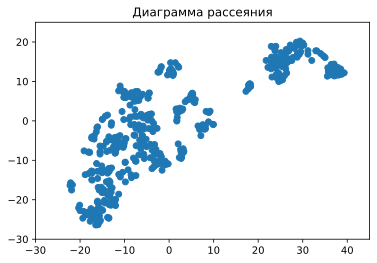

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Диаграмма рассеяния')
plt.axis([-30,45,-30,25])
#plt.grid()
plt.show()

---
## Задание 2

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма `X_train`.

Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью **TSNE**, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения `price` и `CRIM` в разных кластерах.

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [12]:
labels_train = kmeans_model.fit_predict(X_train_scaled)

In [13]:
set(labels_train)

{0, 1, 2}

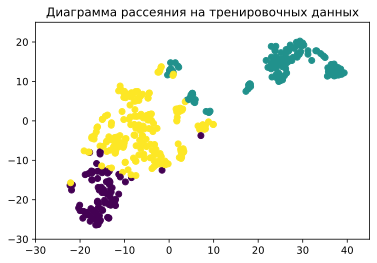

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title('Диаграмма рассеяния на тренировочных данных')
plt.axis([-30,45,-30,25])
plt.show()

Средние значения `price` и `CRIM` в разных кластерах.
#### 1-й кластер:

In [15]:
print(f"Среднее значение 'Price': {y_train[labels_train == 0].mean()[0]}")
print(f"Среднее значение 'CRIM': {X_train['CRIM'][labels_train == 0].mean()}")

Среднее значение 'Price': 27.788372093023252
Среднее значение 'CRIM': 0.07356558139534886


#### 2-й кластер:

In [16]:
print(f"Среднее значение 'Price': {y_train[labels_train == 1].mean()[0]}")
print(f"Среднее значение 'CRIM': {X_train['CRIM'][labels_train == 1].mean()}")

Среднее значение 'Price': 16.165354330708666
Среднее значение 'CRIM': 10.797028425196853


#### 3-й кластер:

In [17]:
print(f"Среднее значение 'Price': {y_train[labels_train == 2].mean()[0]}")
print(f"Среднее значение 'CRIM': {X_train['CRIM'][labels_train == 2].mean()}")

Среднее значение 'Price': 24.958115183246072
Среднее значение 'CRIM': 0.42166020942408367


---
## *Задание 3

Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [18]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [19]:
labels_test = kmeans_model.fit_predict(X_test_scaled)

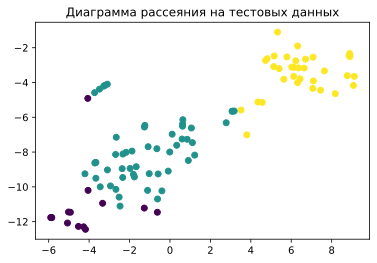

In [20]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.title('Диаграмма рассеяния на тестовых данных')
plt.show()

Средние значения `price` и `CRIM` в разных кластерах на тестовых данных.
#### 1-й кластер:

In [21]:
print(f"Среднее значение 'Price': {y_test[labels_test == 0].mean()[0]}")
print(f"Среднее значение 'CRIM': {X_test['CRIM'][labels_test == 0].mean()}")

Среднее значение 'Price': 33.871428571428574
Среднее значение 'CRIM': 0.08618571428571427


#### 2-й кластер:

In [22]:
print(f"Среднее значение 'Price': {y_test[labels_test == 1].mean()[0]}")
print(f"Среднее значение 'CRIM': {X_test['CRIM'][labels_test == 1].mean()}")

Среднее значение 'Price': 21.552830188679245
Среднее значение 'CRIM': 0.25200716981132076


#### 3-й кластер:

In [23]:
print(f"Среднее значение 'Price': {y_test[labels_test == 2].mean()[0]}")
print(f"Среднее значение 'CRIM': {X_test['CRIM'][labels_test == 2].mean()}")

Среднее значение 'Price': 16.437142857142856
Среднее значение 'CRIM': 10.165531142857143
